### LOAN PREDICTION PROJECT


### The purpose of this project is to build models that can predict the eligibility of clients for loans. After building the models, I aim to choose the best model that can help the company to determine whether it is safe or not safe to give loans to particular customers

#### Steps to arrive at my purpose
 - Import necessary packages
 - Import data set 
 - Exploring the data set
 - Preprocessing the data for modeling 
 - Modeling the data 

### Importing necessary packages for the project 

In [1]:
!pip install bioinfokit
!pip install xgboost jupyter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from bioinfokit.analys import stat

from sklearn.pipeline import make_pipeline


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Importing the data set

In [2]:
data = pd.read_excel('credit-data-training.xlsx')

### Exploring the data

In [3]:
data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

In [5]:
data.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


After viewing the data, the follwing can be said 
- The data is made up of 500 rows and 20 columns 
- Data types contained in the data set are integers, floats, and objects

##### Checking for missing values

In [6]:
data.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

- The variable with the highest missing value is Duration in current address (344 missing values out of 500 ) 
- Another variable with missing value is the 'age years' variable which has 12 missing values.

Conclusion 
 - I will drop the duration in current address after more exploration because the missing values forms 68.8% of that variable which is very high. Failing to drop this variable might cause some bias in the model's prediction.
 - I will not drop the 'age years' because the missing values form just 2.4% of that variable. The best decision is to fill in the mssing values. The method to use will be decided after further exploration.



In [7]:
# cleaning text in 'Value-Savings-Stocks' and 'Length-of-current-employment'

data['Value-Savings-Stocks'] = data['Value-Savings-Stocks'].apply(
    lambda x: x.replace("£", "")).apply(
        lambda x: x.replace("-", "_to_")).apply(
                lambda x: x.replace("< £100", "Less_than_100"))

data['Length-of-current-employment'] = data['Length-of-current-employment'].apply(
        lambda x: x.replace("-", "_to_")).apply(
                lambda x: x.replace("< 1yr", "Less_than_1yr"))

data

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,100_to_1000,Less_than_1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,100_to_1000,Less_than_1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1_to_4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1_to_4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,Less_than_1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,100_to_1000,Less_than_1yr,1,None,1.0,1,NaN,Other Banks/Depts,2,1,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,100_to_1000,Less_than_1yr,1,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,100_to_1000,Less_than_1yr,2,None,NaN,4,27.0,Other Banks/Depts,3,1,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,100_to_1000,4_to_7 yrs,2,None,NaN,4,63.0,Other Banks/Depts,3,1,1,1,2,1


#### Separating categorical variables from numerical variables

This is done to help in proper data handling of the different variable types

In [8]:
cat_var = data.select_dtypes(include = 'object')
num_var = data.select_dtypes(include= np.number)

#### Viewing information about the categorical variables

In [9]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Credit-Application-Result          500 non-null    object
 1   Account-Balance                    500 non-null    object
 2   Payment-Status-of-Previous-Credit  500 non-null    object
 3   Purpose                            500 non-null    object
 4   Value-Savings-Stocks               500 non-null    object
 5   Length-of-current-employment       500 non-null    object
 6   Guarantors                         500 non-null    object
 7   Concurrent-Credits                 500 non-null    object
 8   No-of-Credits-at-this-Bank         500 non-null    object
dtypes: object(9)
memory usage: 35.3+ KB


###### From the information above, it is observed that 9 of the 20 columns are categorical

##### Viewing information about numerical variables

In [10]:
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Duration-of-Credit-Month       500 non-null    int64  
 1   Credit-Amount                  500 non-null    int64  
 2   Instalment-per-cent            500 non-null    int64  
 3   Duration-in-Current-address    156 non-null    float64
 4   Most-valuable-available-asset  500 non-null    int64  
 5   Age-years                      488 non-null    float64
 6   Type-of-apartment              500 non-null    int64  
 7   Occupation                     500 non-null    int64  
 8   No-of-dependents               500 non-null    int64  
 9   Telephone                      500 non-null    int64  
 10  Foreign-Worker                 500 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 43.1 KB


###### From the information above, it is observed that 11 of the 20 columns are numerical

### Exploring categorical variables 
This will help understand the variables well and give information about things to look out for

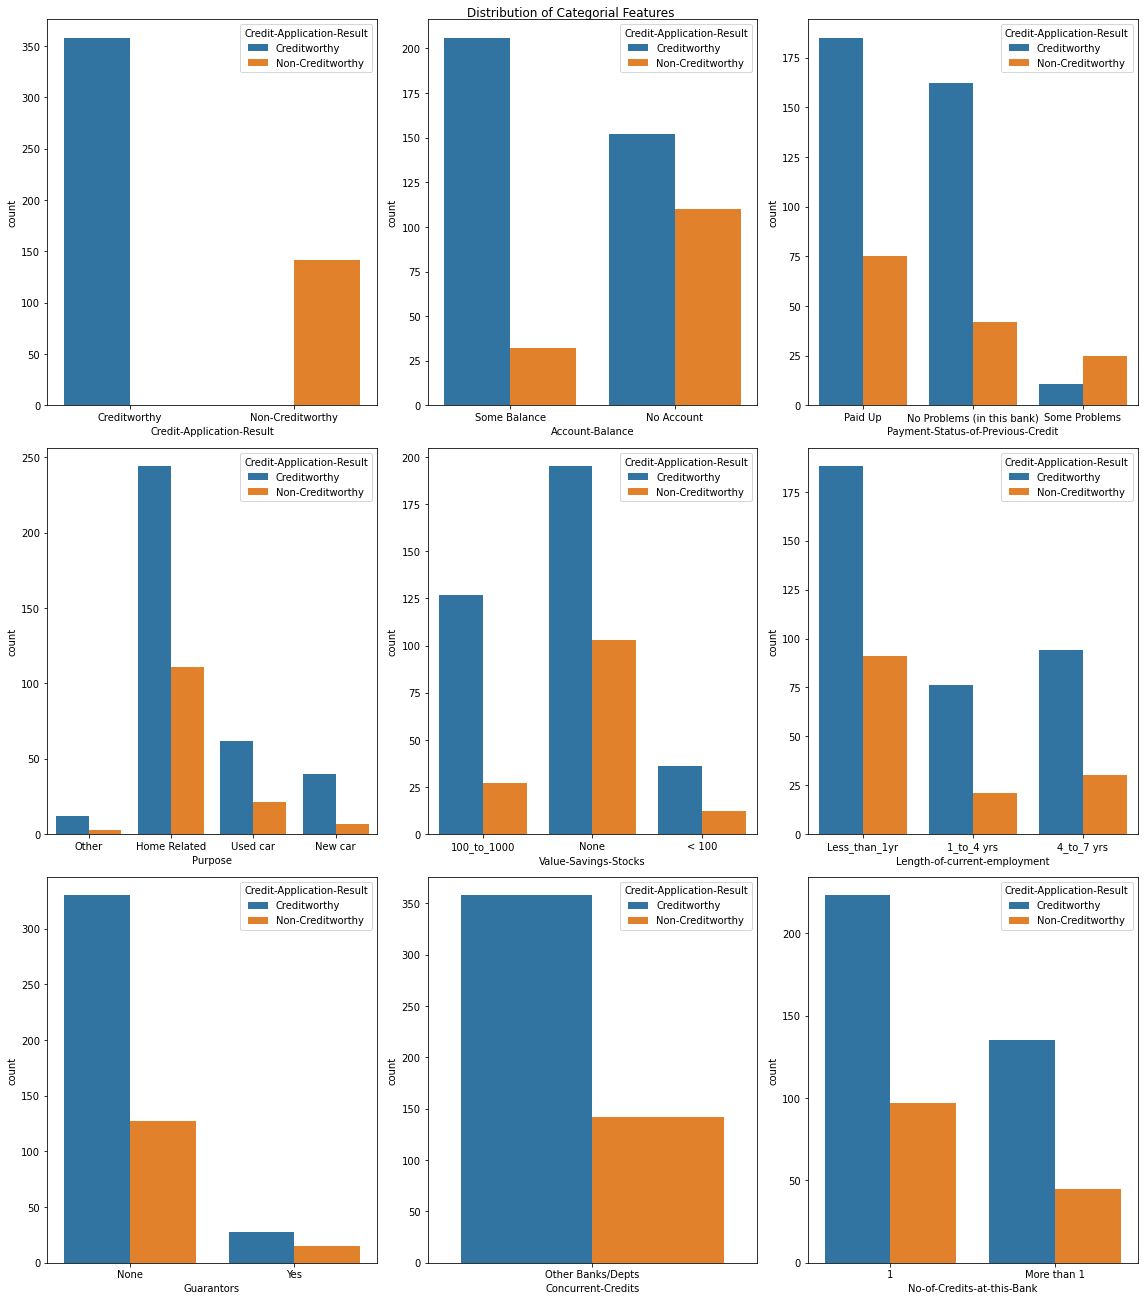

In [11]:
fig,axes = plt.subplots(3,3,figsize=(16,18))
for index,cat_var in enumerate(cat_var):
    row,col = index//3,index%3
    sns.countplot(x=cat_var,data=data,hue= data['Credit-Application-Result'], ax=axes[row,col]) 
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.suptitle(f'Distribution of Categorial Features \n', va='bottom')
plt.show()


| Category | Observation |
|---|:---:|
|  Credit worthiness  | Credit worthiness which is dependent variable is not balanced. Many people were given the loan as compared to people who were rejected |
|  Account Balance  | Customers with some balance have a higher chance of receiving loans |
|  Payment Status of Previous Credit  | Customers with problems in paying previous loans have small chance of receiving loans |
|  Purpose  | Most customers are taking loans for home related purposes |
|  Value Savings in Stock | Customers with no value savings in stock are more than customers with some value in stock |
|  Length of current employment   | Most customers have been in their current roles for less than 1 year. There is a slightly similar loan eligility across the different categories |
|  Guarantors | Most customers had no guarantors |
|  Concurrent Credit   | Concurrent credits has no variability and hence must be dropped to avoid bias in our model |
|  Number of Credits at this Bank | Most customers had only one credit with the bank. Slightly similar loan eligibility across the 2 categories |

### Exploring Categorical Variables

#### Checking the relationship between the individual categorical independent variables and the dependent variable (credit worthiness)

This will give me an idea of the extent to which the independent varibles help in predicting the dependent varibale. It does this by showing if there is a relationship between the independent variable and dependent variable or not. 

In [12]:


#Creating a function to test for relationship

def chisquare_asso(df,x,y):
    table = pd.crosstab(df[x],df[y])
    test = stat()
    test.chisq(df=table)
    
    
    print(f'Null hypothesis: {x} and {y} are independent')
    print(f'Alternate hypothesis: {x} and {y} are dependent')
    print('Decision Rule: Reject Null if p-value <= alpha vale (0.05)')
    print('Test results')
    print('------------------------------------------------')
    print('Observed frequency values \n')
    print(table)
    
          
    print('-------------------------------------------------')
    print(test.expected_df)
    print('-------------------------------------------------')
    print(test.summary)

###### After creating the function, I will now check the relationship by calling the function on each independent categorical variable and the dependent variable

###### Checking for the relationship between credit application result and account balance

In [13]:
chisquare_asso(data, 'Credit-Application-Result', 'Account-Balance')

Null hypothesis: Credit-Application-Result and Account-Balance are independent
Alternate hypothesis: Credit-Application-Result and Account-Balance are dependent
Decision Rule: Reject Null if p-value <= alpha vale (0.05)
Test results
------------------------------------------------
Observed frequency values 

Account-Balance            No Account  Some Balance
Credit-Application-Result                          
Creditworthy                      152           206
Non-Creditworthy                  110            32
-------------------------------------------------

Expected frequency counts

      No Account    Some Balance
--  ------------  --------------
 0       187.592         170.408
 1        74.408          67.592

-------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       48.5598  3.20374e-12
Log-likelihood     1       50.8098  1.017

###### Conclusion

From the table it is observed that p is 3.20374e-12. Therefore, at alpha 0.05 we conclude that there is enough evidence to reject the null hypothesis since p-value<alpha. We therefore conclude that there is a relationship between credit worthiness and account balance

##### This variable is therefore useful in our modeling

###### Checking for the relationship between credit application result and payment status of previous credit

In [14]:
chisquare_asso(data, 'Credit-Application-Result', 'Payment-Status-of-Previous-Credit')

Null hypothesis: Credit-Application-Result and Payment-Status-of-Previous-Credit are independent
Alternate hypothesis: Credit-Application-Result and Payment-Status-of-Previous-Credit are dependent
Decision Rule: Reject Null if p-value <= alpha vale (0.05)
Test results
------------------------------------------------
Observed frequency values 

Payment-Status-of-Previous-Credit  No Problems (in this bank)  Paid Up  \
Credit-Application-Result                                                
Creditworthy                                              162      185   
Non-Creditworthy                                           42       75   

Payment-Status-of-Previous-Credit  Some Problems  
Credit-Application-Result                         
Creditworthy                                  11  
Non-Creditworthy                              25  
-------------------------------------------------

Expected frequency counts

      No Problems (in this bank)    Paid Up    Some Problems
--  ----------

###### Conclusion

From the table it is observed that p is 1.54411e-08. Therefore, at alpha 0.05 we conclude that there is enough evidence to reject the null hypothesis since p-value<alpha. We therefore conclude that there is a relationship between credit worthiness and Payment-Status-of-Previous-Credit

##### This variable is therefore useful in our modeling

###### Checking for the relationship between credit application result and purpose

In [15]:
chisquare_asso(data, 'Credit-Application-Result', 'Purpose')

Null hypothesis: Credit-Application-Result and Purpose are independent
Alternate hypothesis: Credit-Application-Result and Purpose are dependent
Decision Rule: Reject Null if p-value <= alpha vale (0.05)
Test results
------------------------------------------------
Observed frequency values 

Purpose                    Home Related  New car  Other  Used car
Credit-Application-Result                                        
Creditworthy                        244       40     12        62
Non-Creditworthy                    111        7      3        21
-------------------------------------------------

Expected frequency counts

      Home Related    New car    Other    Used car
--  --------------  ---------  -------  ----------
 0          254.18     33.652    10.74      59.428
 1          100.82     13.348     4.26      23.572

-------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  -----

###### Conclusion

From the table it is observed that p is 0.0871538. Therefore, at alpha 0.05 we conclude that there is not enough evidence to reject the null hypothesis since p-value>alpha. We therefore conclude that there is no relationship between credit worthiness and Purpose

##### This variable is therefore not useful in our modeling

###### Checking for the relationship between credit application result and value savings stock

In [16]:
chisquare_asso(data, 'Credit-Application-Result', 'Value-Savings-Stocks')

Null hypothesis: Credit-Application-Result and Value-Savings-Stocks are independent
Alternate hypothesis: Credit-Application-Result and Value-Savings-Stocks are dependent
Decision Rule: Reject Null if p-value <= alpha vale (0.05)
Test results
------------------------------------------------
Observed frequency values 

Value-Savings-Stocks       100_to_1000  < 100  None
Credit-Application-Result                          
Creditworthy                       127     36   195
Non-Creditworthy                    27     12   103
-------------------------------------------------

Expected frequency counts

      100_to_1000    < 100     None
--  -------------  -------  -------
 0        110.264   34.368  213.368
 1         43.736   13.632   84.632

-------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2        14.785  0.00061586
Log-likelihood     2

###### Conclusion

From the table it is observed that p is 0.00061586. Therefore, at alpha 0.05 we conclude that there is enough evidence to reject the null hypothesis since p-value<alpha. We therefore conclude that there is a relationship between credit worthiness and Value-Savings-Stocks

##### This variable is therefore useful in our modeling

###### Checking for the relationship between credit application result and length of current employment

In [17]:
chisquare_asso(data, 'Credit-Application-Result', 'Length-of-current-employment')

Null hypothesis: Credit-Application-Result and Length-of-current-employment are independent
Alternate hypothesis: Credit-Application-Result and Length-of-current-employment are dependent
Decision Rule: Reject Null if p-value <= alpha vale (0.05)
Test results
------------------------------------------------
Observed frequency values 

Length-of-current-employment  1_to_4 yrs  4_to_7 yrs  Less_than_1yr
Credit-Application-Result                                          
Creditworthy                          76          94            188
Non-Creditworthy                      21          30             91
-------------------------------------------------

Expected frequency counts

      1_to_4 yrs    4_to_7 yrs    Less_than_1yr
--  ------------  ------------  ---------------
 0        69.452        88.784          199.764
 1        27.548        35.216           79.236

-------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square 

###### Conclusion

From the table it is observed that p is 0.0580725. Therefore, at alpha 0.05 we conclude that there is not enough evidence to reject the null hypothesis since p-value>alpha. We therefore conclude that there is a no relationship between credit worthiness and Length-of-current-employment

##### This variable is therefore not useful in our modeling

###### Checking for the relationship between credit application result and guarantors

In [18]:
chisquare_asso(data, 'Credit-Application-Result', 'Guarantors')

Null hypothesis: Credit-Application-Result and Guarantors are independent
Alternate hypothesis: Credit-Application-Result and Guarantors are dependent
Decision Rule: Reject Null if p-value <= alpha vale (0.05)
Test results
------------------------------------------------
Observed frequency values 

Guarantors                 None  Yes
Credit-Application-Result           
Creditworthy                330   28
Non-Creditworthy            127   15
-------------------------------------------------

Expected frequency counts

       None     Yes
--  -------  ------
 0  327.212  30.788
 1  129.788  12.212

-------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.655037   0.418317
Log-likelihood     1      0.635101   0.425491



###### Conclusion

From the table it is observed that p is 0.418317. Therefore, at alpha 0.05 we conclude that there is not enough evidence to reject the null hypothesis since p-value>alpha. We therefore conclude that there is a no relationship between credit worthiness and Guarantors

##### This variable is therefore not useful in our modeling

###### Checking for the relationship between credit application result and concurrent credits

In [19]:
chisquare_asso(data, 'Credit-Application-Result', 'Concurrent-Credits')

Null hypothesis: Credit-Application-Result and Concurrent-Credits are independent
Alternate hypothesis: Credit-Application-Result and Concurrent-Credits are dependent
Decision Rule: Reject Null if p-value <= alpha vale (0.05)
Test results
------------------------------------------------
Observed frequency values 

Concurrent-Credits         Other Banks/Depts
Credit-Application-Result                   
Creditworthy                             358
Non-Creditworthy                         142
-------------------------------------------------

Expected frequency counts

      Other Banks/Depts
--  -------------------
 0                  358
 1                  142

-------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            0             0          1
Log-likelihood     0             0          1



###### Conclusion

From the table it is observed that p is 1. Therefore, at alpha 0.05 we conclude that there is not enough evidence to reject the null hypothesis since p-value>alpha. We therefore conclude that there is a no relationship between credit worthiness and Concurrent-Credits 

##### This variable is therefore not useful in our modeling

###### Checking for the relationship between credit application result and number of credits at this bank

In [20]:
chisquare_asso(data, 'Credit-Application-Result', 'No-of-Credits-at-this-Bank')

Null hypothesis: Credit-Application-Result and No-of-Credits-at-this-Bank are independent
Alternate hypothesis: Credit-Application-Result and No-of-Credits-at-this-Bank are dependent
Decision Rule: Reject Null if p-value <= alpha vale (0.05)
Test results
------------------------------------------------
Observed frequency values 

No-of-Credits-at-this-Bank    1  More than 1
Credit-Application-Result                   
Creditworthy                223          135
Non-Creditworthy             97           45
-------------------------------------------------

Expected frequency counts

         1    More than 1
--  ------  -------------
 0  229.12         128.88
 1   90.88          51.12

-------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       1.34831   0.245574
Log-likelihood     1       1.36299   0.243021



###### Conclusion

From the table it is observed that p is 0.245574. Therefore, at alpha 0.05 we conclude that there is not enough evidence to reject the null hypothesis since p-value>alpha. We therefore conclude that there is a no relationship between credit worthiness and No-of-Credits-at-this-Bank 

##### This variable is therefore not useful in our modeling

### Conclusions drawn from the chisquare test 

##### After the test it is observed that some independent variables have no relationship with the dependent variable

###### These variables are Length-of-current-employment , Guarantors , Concurrent-Credits , No-of-Credits-at-this-Bank

###### These variables will be dropped since they have no relationship with the loan application result according to the metrics used in this project.

### Let us explore our numerical variables now 

This helps to understand the variables and gives information about things to look out for

In [21]:
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Duration-of-Credit-Month       500 non-null    int64  
 1   Credit-Amount                  500 non-null    int64  
 2   Instalment-per-cent            500 non-null    int64  
 3   Duration-in-Current-address    156 non-null    float64
 4   Most-valuable-available-asset  500 non-null    int64  
 5   Age-years                      488 non-null    float64
 6   Type-of-apartment              500 non-null    int64  
 7   Occupation                     500 non-null    int64  
 8   No-of-dependents               500 non-null    int64  
 9   Telephone                      500 non-null    int64  
 10  Foreign-Worker                 500 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 43.1 KB


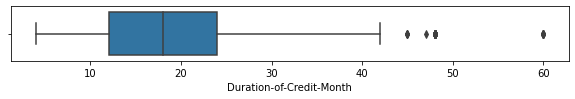

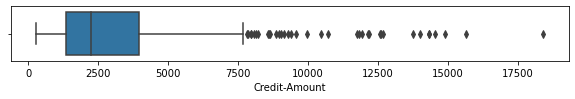

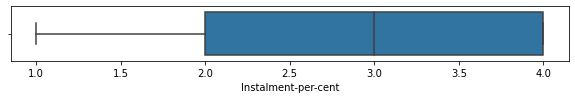

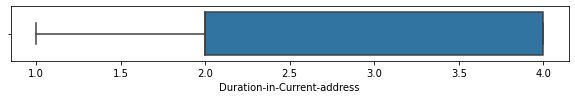

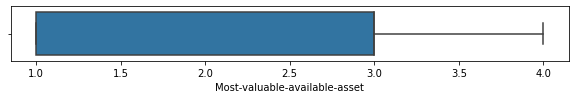

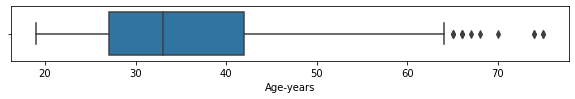

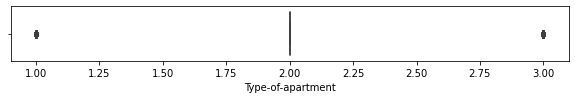

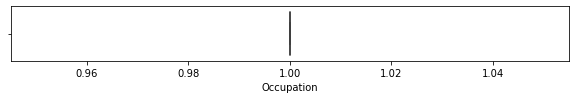

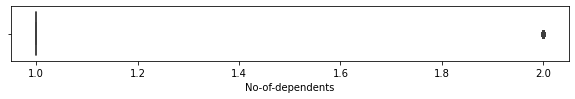

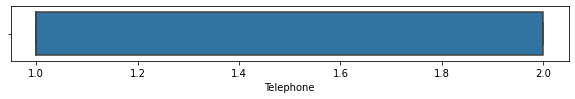

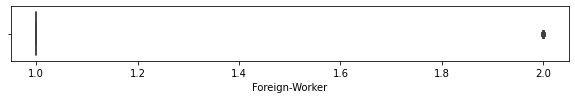

In [22]:
# plotting a boxplot of the numerical variables to check for outliers
# plotting a boxplot
for col in num_var:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=num_var,x=data[col],orient='h')

### Key findings after exploring numerical varibales

#### Missing values
- Duration in current address will be dropped because it has 68.8% of its values to be missing. Failing to drop this variable will result in some form of bias in the model's prediction.

- Age in years also contains some missing values. However the missing values form 2.4% of the values and hence will rather be filled instead of being dropped. I will later explore age in years to see how best to fill in the missing  values.

#### Variables to be dropped
- From the boxplot, the mean and median of occupation is the same this is a sign of no variability and hence must be dropped. I will check for the variability of occupation for confirmation.

- Telephone has to be dropped because, intuitively, telephone number has no effect on loan eligibility

- Foreign worker will also be dropped because of low variance


##### Exploring age in years to determine how best to fill in the missing values

In [23]:
num_var['Age-years'].describe()

count    488.000000
mean      35.637295
std       11.501522
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Age-years, dtype: float64

'age-years' has a mean of 35.637. However, this is not the best way to fill the missing values because from the boxplot, it was observed that 'age- years' contained outliers.
 - Recall that outliers have effect on mean and hence will not be the best option in filling the missing values
 - The best way to do this will be to use the median since outliers have no effect on the median


#### Finding the median of 'age-years' and filling in the missing values

In [24]:
age_median = round(data['Age-years'].median())
age_median

33

##### Filling in the missing values with the median

In [25]:
data['Age-years']=data['Age-years'].fillna(age_median)

In [26]:
data['Age-years'].head()

0    33.0
1    29.0
2    42.0
3    37.0
4    27.0
Name: Age-years, dtype: float64

###### Checking the distribution of age and loan eligibility

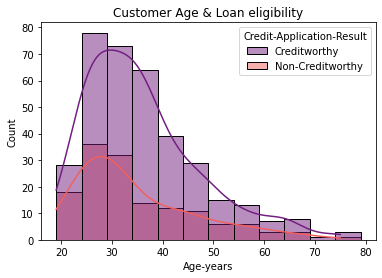

In [27]:
sns.histplot(x=data['Age-years'],
             hue=data['Credit-Application-Result'],
             kde=True,
             binwidth=5,
             palette='magma')
plt.title('Customer Age & Loan eligibility')
plt.show()

It is evident that there is no age preference when deciding loan eligibility. Every age has similar chance of receiving a loan 

In [28]:
#### Updating num_var to reflect changes made to 'age-years'

num_var = data.select_dtypes(include= np.number)

In [29]:
#### checking for effect of the changes made
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Duration-of-Credit-Month       500 non-null    int64  
 1   Credit-Amount                  500 non-null    int64  
 2   Instalment-per-cent            500 non-null    int64  
 3   Duration-in-Current-address    156 non-null    float64
 4   Most-valuable-available-asset  500 non-null    int64  
 5   Age-years                      500 non-null    float64
 6   Type-of-apartment              500 non-null    int64  
 7   Occupation                     500 non-null    int64  
 8   No-of-dependents               500 non-null    int64  
 9   Telephone                      500 non-null    int64  
 10  Foreign-Worker                 500 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 43.1 KB


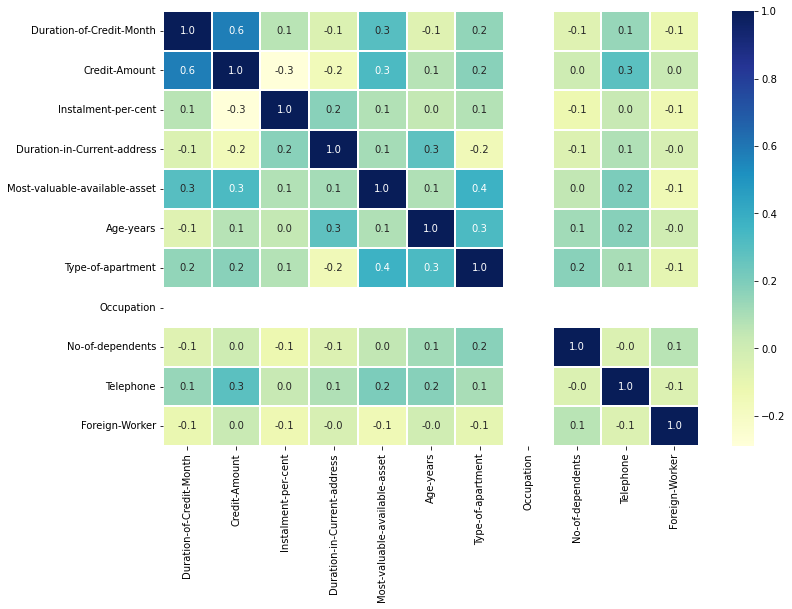

In [30]:
### checking for correlation between the numerical variables 

plt.figure(figsize=(12,8))
sns.heatmap(num_var.corr(), cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.1)
plt.show()

From the correlation map, it is observed that the independent variables are not highly correlated.

Occupation has no variability and will be dropped to remove bias from the model.

In [31]:
#### Exploring the data again

data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,100_to_1000,Less_than_1yr,1,None,2.0,1,33.0,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,100_to_1000,Less_than_1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1_to_4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1_to_4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,Less_than_1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

### Data Preprocessing

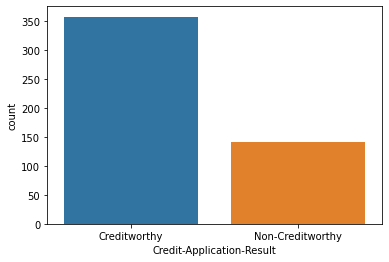

In [33]:
### Taking a look at our y variable again

sns.countplot(data['Credit-Application-Result'])
plt.show()

### Note: The target variable is not balanced and hence, accuracy will not be a good metric for measuring performance of the models in this data

#### Dropping all variables we concluded to drop


In [34]:
data = data.drop(columns=['Occupation', 'Telephone','Concurrent-Credits',
                        'Duration-in-Current-address','Guarantors',
                       'No-of-dependents','Foreign-Worker',
                          'Length-of-current-employment',
                          'No-of-Credits-at-this-Bank'], axis=1)

In [35]:
data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,100_to_1000,1,1,33.0,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,100_to_1000,1,1,29.0,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,2,1,42.0,2
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1,1,37.0,2
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,4,1,27.0,2


In [36]:
data['Purpose'].replace({'Other':'Home Related'},inplace=True)

In [37]:
data['Purpose'].value_counts()

Home Related    370
Used car         83
New car          47
Name: Purpose, dtype: int64

### Now, I need to change the categorical variable into dummy variables


###### NOTE : Here, I will use the one hot encoder because the variables contain non-hierarchical features. This means that the responses are not greater than one another within the variables. However, I will use the drop_first command to avoid multicollinearity. 

##### Encoding the independent variables

In [38]:
data = pd.get_dummies(data,columns= ['Account-Balance',
                                     'Payment-Status-of-Previous-Credit',
                                     'Purpose','Value-Savings-Stocks'],
                      drop_first = True)

In [39]:
#### checking to see if the change was done
data.dtypes

Credit-Application-Result                           object
Duration-of-Credit-Month                             int64
Credit-Amount                                        int64
Instalment-per-cent                                  int64
Most-valuable-available-asset                        int64
Age-years                                          float64
Type-of-apartment                                    int64
Account-Balance_Some Balance                         uint8
Payment-Status-of-Previous-Credit_Paid Up            uint8
Payment-Status-of-Previous-Credit_Some Problems      uint8
Purpose_New car                                      uint8
Purpose_Used car                                     uint8
Value-Savings-Stocks_< 100                           uint8
Value-Savings-Stocks_None                            uint8
dtype: object

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Credit-Application-Result                        500 non-null    object 
 1   Duration-of-Credit-Month                         500 non-null    int64  
 2   Credit-Amount                                    500 non-null    int64  
 3   Instalment-per-cent                              500 non-null    int64  
 4   Most-valuable-available-asset                    500 non-null    int64  
 5   Age-years                                        500 non-null    float64
 6   Type-of-apartment                                500 non-null    int64  
 7   Account-Balance_Some Balance                     500 non-null    uint8  
 8   Payment-Status-of-Previous-Credit_Paid Up        500 non-null    uint8  
 9   Payment-Status-of-Previous-Credi

##### Encoding the dependent variable

In [41]:
data = pd.get_dummies(data,columns= ['Credit-Application-Result'],drop_first = True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Duration-of-Credit-Month                         500 non-null    int64  
 1   Credit-Amount                                    500 non-null    int64  
 2   Instalment-per-cent                              500 non-null    int64  
 3   Most-valuable-available-asset                    500 non-null    int64  
 4   Age-years                                        500 non-null    float64
 5   Type-of-apartment                                500 non-null    int64  
 6   Account-Balance_Some Balance                     500 non-null    uint8  
 7   Payment-Status-of-Previous-Credit_Paid Up        500 non-null    uint8  
 8   Payment-Status-of-Previous-Credit_Some Problems  500 non-null    uint8  
 9   Purpose_New car                 

In [43]:
data.tail()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_< 100,Value-Savings-Stocks_None,Credit-Application-Result_Non-Creditworthy
495,60,7418,1,1,33.0,2,0,0,0,0,0,0,0,0
496,60,7418,1,1,27.0,2,0,0,0,0,0,0,0,0
497,60,9157,2,4,27.0,3,0,0,0,0,0,0,0,0
498,60,13756,2,4,63.0,3,1,0,0,0,0,0,0,0
499,60,14027,4,4,27.0,2,0,1,0,0,0,0,1,1


#### Splitting the data into Independent and Target Variables

In [44]:
#Independent Variables
ind_var = data.drop('Credit-Application-Result_Non-Creditworthy', axis=1)

# Target Variable
target_var = data['Credit-Application-Result_Non-Creditworthy']

In [45]:
ind_var.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_< 100,Value-Savings-Stocks_None
0,4,1494,1,1,33.0,2,1,1,0,0,0,0,0
1,4,1494,1,1,29.0,2,1,1,0,0,0,0,0
2,4,1544,2,1,42.0,2,1,0,0,0,0,0,1
3,4,3380,1,1,37.0,2,1,0,0,0,0,0,1
4,6,343,4,1,27.0,2,0,1,0,0,0,0,1


In [46]:
target_var.head()

0    0
1    0
2    0
3    0
4    0
Name: Credit-Application-Result_Non-Creditworthy, dtype: uint8

### Modeling 

###### At this stage I am going to find the best parameters for some classifiers and use the output to instantiate the model. 

###### Remember that the target variable is unbalanced therefore, I will create the confusion matrix, classification reports and ROC curve to see the strength of the respective models

###### Splitting the data into test and train

In [47]:
X_train, X_test, y_train, y_test = train_test_split(ind_var, target_var, test_size =0.30, stratify=target_var,random_state=42)

### Decision Tree

In [48]:

tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_features':[1,2,3,4,5,6,7,8,9,10], 'max_leaf_nodes':[1,2,3,4,5]}
grid_tree  = GridSearchCV(tree, param_grid = param_grid,cv = 5)
grid_tree.fit(X_train,y_train)
print('Best cross-validation accuracy: {:.2f}' . format(grid_tree.best_score_)) ## X_train,y_train)

print('Best parameters:',grid_tree.best_params_)

Best cross-validation accuracy: 0.78
Best parameters: {'max_features': 7, 'max_leaf_nodes': 5}


The best parameter for max feature and max leaf nodes is 8 and 5 respectively.
I will now go on to instantiate the decision tree model with the given parameters.

In [49]:
#Instantiating the model with tuned hyperparameters

tree = DecisionTreeClassifier(max_features=7, max_leaf_nodes =5, random_state=42)

# Fitting the model
tree.fit(X_train,y_train)

#Printing test and train accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))

train accuracy: 0.80
test accuracy: 0.75


The train accuracy is 80% whiles the test accuracy is 75%. However, remember the target variable is not balanced and we cannot judge the model with the accuracy scores 

#### Let us use the confusion matrix to check the strength of the decision tree model

In [50]:
y_pred = grid_tree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[97 10]
 [28 15]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       107
           1       0.60      0.35      0.44        43

    accuracy                           0.75       150
   macro avg       0.69      0.63      0.64       150
weighted avg       0.73      0.75      0.72       150



### Conclusion 

#### Confusion Matrix
###### In total the decision tree model was able to classify 112 people into the correct outcome out of a total of 150 people

#### Classification report
###### The Recall tells us that out of the total 125 people predicted to receive the loan, the model was able to correctly classify 97 of them. On the other hand, out of the total 25 people predicted to not receive the loan, the model was able to correctly classify 15 of them

###### The Precision tells us that out of the total 107 people who actually received the loan, the model was able to correctly classify 97 of them. On the other hand, out of the total 43 people who actually did not receive the loan, the model was able to correctly classify 15 of them


### Logistic Regresion

In [51]:
lgr = LogisticRegression(C=1)
lgr.fit(X_train,y_train)
print('train score: ',lgr.score(X_train,y_train))
print('test score: ',lgr.score(X_test,y_test))
pred = lgr.predict(X_test)

train score:  0.78
test score:  0.7666666666666667


In [52]:
lr = LogisticRegression()
param_grid = {'C': [0.01,0.05,0.5,0.1,1.5,10,50,70,100]}
grid_lgr = GridSearchCV(lr, param_grid, cv=5)
grid_lgr.fit(X_train, y_train)

print('Best cross-validation accuracy: {:.2f}'.format(grid_lgr.best_score_))
print('Best test score: {:.2f}'.format(grid_lgr.score(X_test,y_test)))
print('Best parameters:',grid_lgr.best_params_)

Best cross-validation accuracy: 0.78
Best test score: 0.73
Best parameters: {'C': 0.1}


Now, the best C is 0.1. Let us now go ahead and instantiate the logistic regression model using the best C which is 0.1

In [53]:
lgr = LogisticRegression(C=0.1).fit(X_train,y_train)
print('train score: ',lgr.score(X_train,y_train))
print('test score: ',lgr.score(X_test,y_test))

train score:  0.7742857142857142
test score:  0.7266666666666667


#### Confusion matrix and classification report

In [54]:
# confusion matrix
y_pred = grid_lgr.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[101   6]
 [ 35   8]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       107
           1       0.57      0.19      0.28        43

    accuracy                           0.73       150
   macro avg       0.66      0.56      0.56       150
weighted avg       0.69      0.73      0.67       150



### Conclusion 

#### Confusion Matrix
###### In total the logistic regression model was able to classify 109 people into the correct outcome out of a total of 150 people

#### Classification report
###### The Recall tells us that out of the total 136 people predicted to receive the loan, the model was able to correctly classify 101 of them. On the other hand, out of the total 14 people predicted to not receive the loan, the model was able to correctly classify 8 of them

###### The Precision tells us that out of the total 107 people who actually received the loan, the model was able to correctly classify 101 of them. On the other hand, out of the total 43 people who actually did not receive the loan, the model was able to correctly classify 8 of them


### Support Vector Machine

In [55]:
steps = [("Scaler", StandardScaler()),("SVM",SVC())]
pipeline = Pipeline(steps)

parameters = {"SVM__C":[1,10,100],
              "SVM__gamma":[0.1,0.01]}


svc = GridSearchCV(pipeline,parameters, cv=5)

svc.fit(X_train,y_train)

print("Best Model Parameters: {}". format(svc.best_params_))
print("Training score: {}".format(svc.score(X_train,y_train)))
print("Test score: {}".format(svc.score(X_test,y_test)))

svc_predict = svc.predict(X_test)

Best Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}
Training score: 0.82
Test score: 0.7733333333333333


In [56]:
# fitting the model with the tuned hyper-parameters

svc = Pipeline([('Scaler', StandardScaler()), ('SVC', SVC(C=10,gamma=0.01, probability=True))])
svc_model = svc.fit(X_train,y_train)

print('train score: {:.2f}'.format(svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(svc_model.score(X_test,y_test)))


train score: 0.82
test score: 0.77


#### Confusion matrix and classification report

In [57]:
svc_predict = svc.predict(X_test)
conf_mat = confusion_matrix(y_test, svc_predict)
print("Confusion matrix:\n{}".format(conf_mat))

print(classification_report(y_test, svc_predict))

Confusion matrix:
[[104   3]
 [ 31  12]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       107
           1       0.80      0.28      0.41        43

    accuracy                           0.77       150
   macro avg       0.79      0.63      0.64       150
weighted avg       0.78      0.77      0.73       150



### Conclusion 

#### Confusion Matrix
###### In total the support vector machine classifier model was able to classify 116 people into the correct outcome out of a total of 150 people

#### Classification report
###### The Recall tells us that out of the total 135 people predicted to receive the loan, the model was able to correctly classify 104 of them. On the other hand, out of the total 15 people predicted to not receive the loan, the model was able to correctly classify 12 of them

###### The Precision tells us that out of the total 107 people who actually received the loan, the model was able to correctly classify 104 of them. On the other hand, out of the total 43 people who actually did not receive the loan, the model was able to correctly classify 12 of them


### Random Forest 

In [58]:
rfc = RandomForestClassifier(random_state = 0)
param_grid = {'max_depth': [ 1,2,3,4,5,6,7,8,9,10],'max_features':[1,2,3,4,5,6,7,8],'max_leaf_nodes':[1,2,3,4,5,6]}
grid_rfc = GridSearchCV(rfc,param_grid = param_grid,cv=5)
grid_rfc.fit(X_train,y_train)

print('Best cross-validation accuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best train score: {:.2f}'.format(grid_rfc.score(X_train,y_train)))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation accuracy: 0.78
Best train score: 0.82
Best test score: 0.76
Best parameters: {'max_depth': 5, 'max_features': 7, 'max_leaf_nodes': 6}


In [59]:
# Instantiating the random forest model with the best parameters

rfc=RandomForestClassifier(max_depth = 5,max_features=7,max_leaf_nodes=6)


rfc.fit(X_train,y_train)


print('train score: ',rfc.score(X_train,y_train))
print('test score: ',rfc.score(X_test,y_test))

train score:  0.8228571428571428
test score:  0.7533333333333333


In [60]:
# confusion matrix
y_pred = grid_rfc.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[101   6]
 [ 30  13]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       107
           1       0.68      0.30      0.42        43

    accuracy                           0.76       150
   macro avg       0.73      0.62      0.63       150
weighted avg       0.75      0.76      0.73       150



### Conclusion 

#### Confusion Matrix
###### In total the random forest model was able to classify 114 people into the correct outcome out of a total of 150 people

#### Classification report
###### The Recall tells us that out of the total 131 people predicted to receive the loan, the model was able to correctly classify 101 of them. On the other hand, out of the total 19 people predicted to not receive the loan, the model was able to correctly classify 13 of them

###### The Precision tells us that out of the total 107 people who actually received the loan, the model was able to correctly classify 101 of them. On the other hand, out of the total 43 people who actually did not receive the loan, the model was able to correctly classify 13 of them


### Gradient Boost Classifier

In [61]:
gbc = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42)

gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Train accuracy of GradientBoosting Classifier:',gbc.score(X_train,y_train))
print('Test accuracy of GradientBoosting Classifier:',gbc.score(X_test,y_test))


Train accuracy of GradientBoosting Classifier: 0.8371428571428572
Test accuracy of GradientBoosting Classifier: 0.7466666666666667


In [62]:
gbc = GradientBoostingClassifier(n_estimators=300,max_depth=1, random_state=42)
param_grid = {'max_features':[1,2,3,4,5,6,7,8,9,10], 'max_leaf_nodes':[1,2,3,4,5,6], 'max_depth': [ 1,2,3,4,5,6,7,8,9,10]}
grid_gbc = GridSearchCV(gbc, param_grid = param_grid, cv=5)

grid_gbc.fit(X_train,y_train)
print('Best cross-validation accuracy: {:.2f}'.format(grid_gbc.best_score_))
print('Best train score: {:.2f}'.format(grid_gbc.score(X_train,y_train)))

print('Best test scores: {:.2f}'.format(grid_gbc.score(X_test,y_test)))
print('Best parameters:', grid_gbc.best_params_)

Best cross-validation accuracy: 0.79
Best train score: 0.81
Best test scores: 0.75
Best parameters: {'max_depth': 1, 'max_features': 1, 'max_leaf_nodes': 2}


In [63]:
#Instantiating the model with the best hyperparameter

gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,max_depth=1, random_state=42,max_features=1, max_leaf_nodes=2)


gbc.fit(X_train, y_train)

print('train score: ',gbc.score(X_train,y_train))
print('test score: ',gbc.score(X_test,y_test))

train score:  0.8542857142857143
test score:  0.72


In [64]:
y_pred = grid_gbc.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[99  8]
 [29 14]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       107
           1       0.64      0.33      0.43        43

    accuracy                           0.75       150
   macro avg       0.70      0.63      0.64       150
weighted avg       0.73      0.75      0.72       150



### Conclusion 

#### Confusion Matrix
###### In total the gradient boost classifier model was able to classify 113 people into the correct outcome out of a total of 150 people

#### Classification report
###### The Recall tells us that out of the total 128 people predicted to receive the loan, the model was able to correctly classify 99 of them. On the other hand, out of the total 22 people predicted to not receive the loan, the model was able to correctly classify 14 of them

###### The Precision tells us that out of the total 107 people who actually received the loan, the model was able to correctly classify 99 of them. On the other hand, out of the total 43 people who actually did not receive the loan, the model was able to correctly classify 14 of them


### AdaBoost Classifier

In [65]:
decisiont = DecisionTreeClassifier(max_depth=1, random_state=42)

#AdaBoost Classifier
adb = AdaBoostClassifier(base_estimator=decisiont, n_estimators=30, random_state=42)

#Fit 'adb' to the training set
adb.fit(X_train,y_train)
print('Train accuracy of AdaBoostClassifier: {:.3f}'.format(adb.score(X_train,y_train)))
print('Test accuracy of AdaBoostClassifier: {:.3f}'.format(adb.score(X_test,y_test)))


Train accuracy of AdaBoostClassifier: 0.846
Test accuracy of AdaBoostClassifier: 0.740


In [66]:
y_pred = adb.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[93 14]
 [25 18]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       107
           1       0.56      0.42      0.48        43

    accuracy                           0.74       150
   macro avg       0.68      0.64      0.65       150
weighted avg       0.72      0.74      0.73       150



### Conclusion 

#### Confusion Matrix
###### In total the AdaBoost classifier model was able to classify 111 people into the correct outcome out of a total of 150 people

#### Classification report
###### The Recall tells us that out of the total 118 people predicted to receive the loan, the model was able to correctly classify 93 of them. On the other hand, out of the total 32 people predicted to not receive the loan, the model was able to correctly classify 18 of them

###### The Precision tells us that out of the total 107 people who actually received the loan, the model was able to correctly classify 93 of them. On the other hand, out of the total 43 people who actually did not receive the loan, the model was able to correctly classify 18 of them


### ROC CURVE

##### Predicting the probabilities

In [67]:
r_probs = [0 for _ in range(len(y_test))]
rfc_probs = rfc.predict_proba(X_test)
tree_probs  = tree.predict_proba(X_test)
lgr_probs = lgr.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
gbc_probs = gbc.predict_proba(X_test)
adb_probs = adb.predict_proba(X_test)

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
rfc_probs=rfc_probs[:,1]
tree_probs = tree_probs[:,1]
lgr_probs = lgr_probs[:,1]
gbc_probs = gbc_probs[:,1]
svc_probs = svc_probs[:,1]
adb_probs = adb_probs[:,1]

##### Calculating the False positives and true positives for the respective models

In [70]:
r_fpr , r_tpr, _ = roc_curve(y_test,r_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test,rfc_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test,tree_probs)
lgr_fpr, lgr_tpr, _ = roc_curve(y_test,lgr_probs)
gbc_fpr, gbc_tpr, _ = roc_curve(y_test,gbc_probs)
svc_fpr , svc_tpr, _ = roc_curve(y_test,svc_probs)
adb_fpr , adb_tpr, _ = roc_curve(y_test,adb_probs)

#### Calculating the AUROC for each model

In [71]:
r_auc = roc_auc_score(y_test,r_probs)
rfc_auc = roc_auc_score(y_test,rfc_probs)
tree_auc= roc_auc_score(y_test,tree_probs)
lgr_auc= roc_auc_score(y_test,lgr_probs)
gbc_auc= roc_auc_score(y_test,gbc_probs)
svc_auc= roc_auc_score(y_test,svc_probs)
adb_auc= roc_auc_score(y_test,adb_probs)

print('The AUROC for The random prediction is: {:.2f}'.format(r_auc))
print('The AUROC for Random forest is: {:.2f}'.format(rfc_auc))
print('The AUROC for Decision tree is: {:.2f}'.format(tree_auc))
print('The AUROC for Logistic Regresiion is: {:.2f}'.format(lgr_auc))
print('The AUROC for Gradient Boosting is: {:.2f}'.format(gbc_auc))
print('The AUROC for Support Vector Classifier is: {:.2f}'.format(svc_auc))
print('The AUROC for AdaBoost Classifier is: {:.2f}'.format(adb_auc))

The AUROC for The random prediction is: 0.50
The AUROC for Random forest is: 0.78
The AUROC for Decision tree is: 0.64
The AUROC for Logistic Regresiion is: 0.75
The AUROC for Gradient Boosting is: 0.74
The AUROC for Support Vector Classifier is: 0.73
The AUROC for AdaBoost Classifier is: 0.73


### Plotting the ROC

<function matplotlib.pyplot.show(close=None, block=None)>

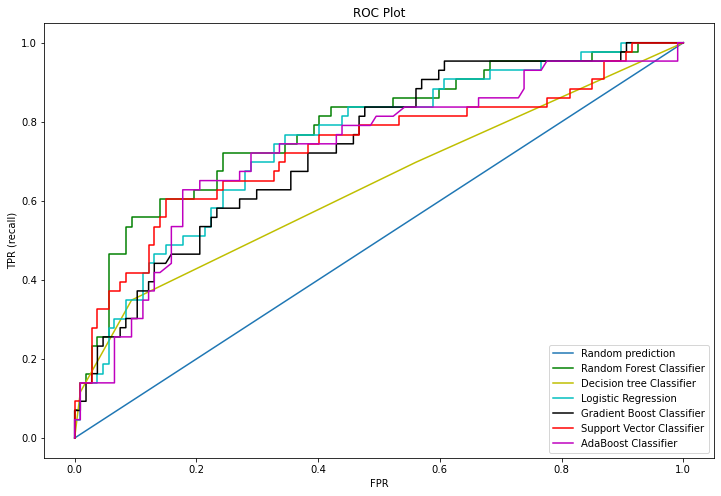

In [72]:
plt.figure(figsize=(12,8))

plt.plot(r_fpr, r_tpr, label = 'Random prediction'%(r_auc))
plt.plot(rfc_fpr, rfc_tpr,label = 'Random Forest Classifier'%(rfc_auc), c='g')
plt.plot(tree_fpr, tree_tpr, label = 'Decision tree Classifier'%(tree_auc), c='y')
plt.plot(lgr_fpr, lgr_tpr, label = 'Logistic Regression'%(lgr_auc), c='c')
plt.plot(gbc_fpr, gbc_tpr, label = 'Gradient Boost Classifier'%(gbc_auc),c='k')
plt.plot(svc_fpr,svc_tpr, label = 'Support Vector Classifier'%(svc_auc),c='r')
plt.plot(adb_fpr,adb_tpr, label = 'AdaBoost Classifier'%(adb_auc),c='m')


plt.title('ROC Plot')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)
plt.show


### Judging from the model metrics, it is evident that the random forest classifier has the best classification for our data. I will choose the random forest classifier as the best model. 

##### Let us dive into the variables that contributed to the model 

#### Checking for feature importance

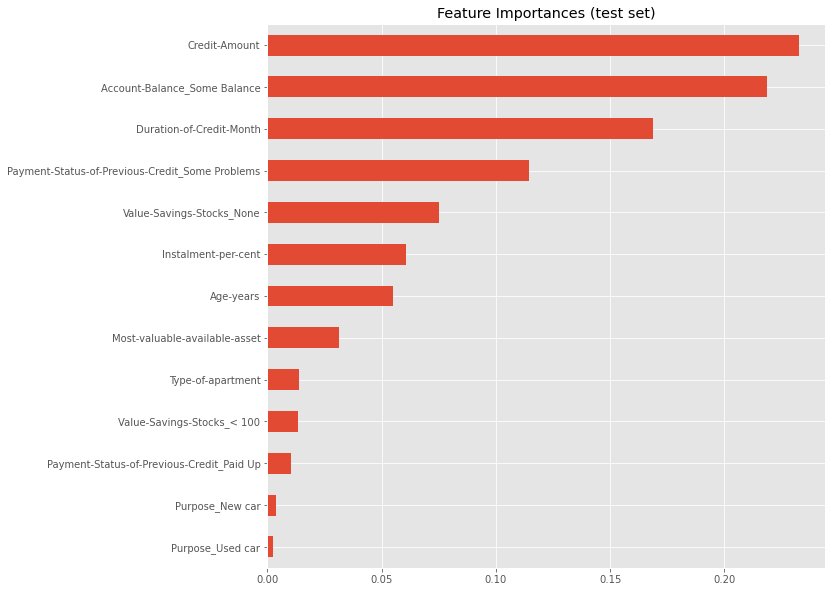

In [73]:
# Feature Importance
with plt.style.context('ggplot'):
    pd.Series(rfc.feature_importances_,
          index=X_test.columns).sort_values().plot(kind='barh',
                                                          figsize=(10, 10))
    plt.title('Feature Importances (test set)')

In [74]:
from sklearn.inspection import permutation_importance

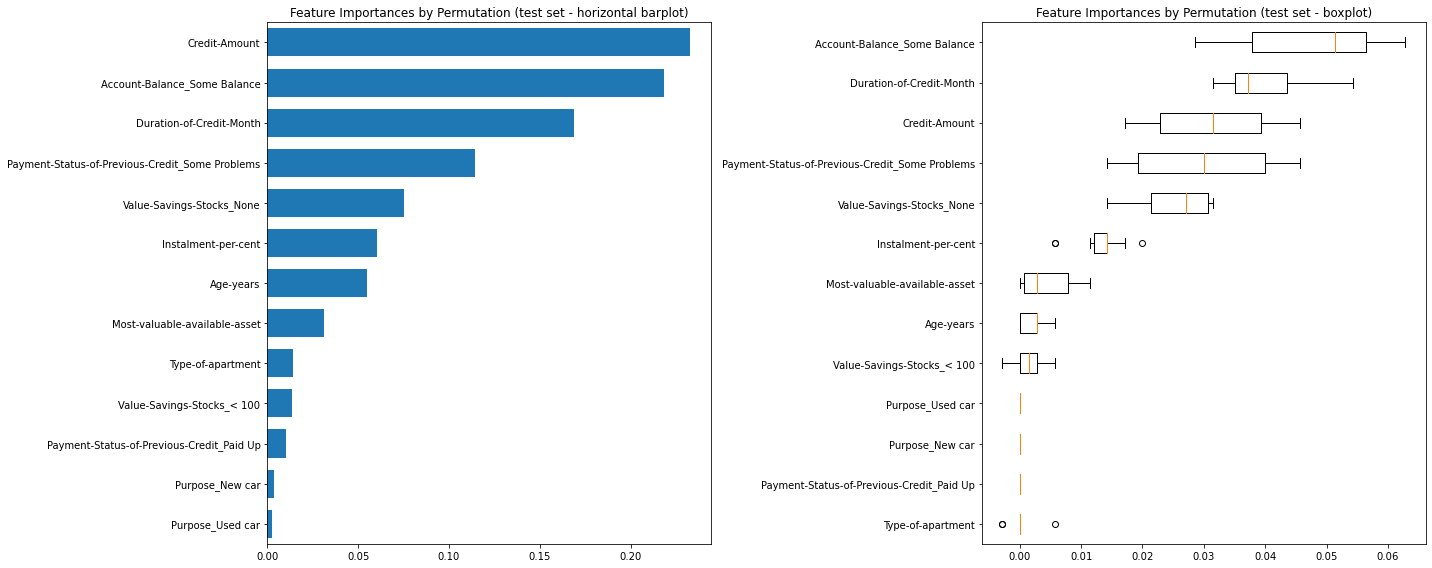

In [75]:
result = permutation_importance(rfc, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rfc.feature_importances_)
tree_indices = np.arange(0, len(rfc.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.barh(tree_indices, rfc.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_test.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(rfc.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_test.columns[perm_sorted_idx],
)
ax1.set_title("Feature Importances by Permutation (test set - horizontal barplot)")
ax2.set_title("Feature Importances by Permutation (test set - boxplot)")
fig.tight_layout()
plt.show()

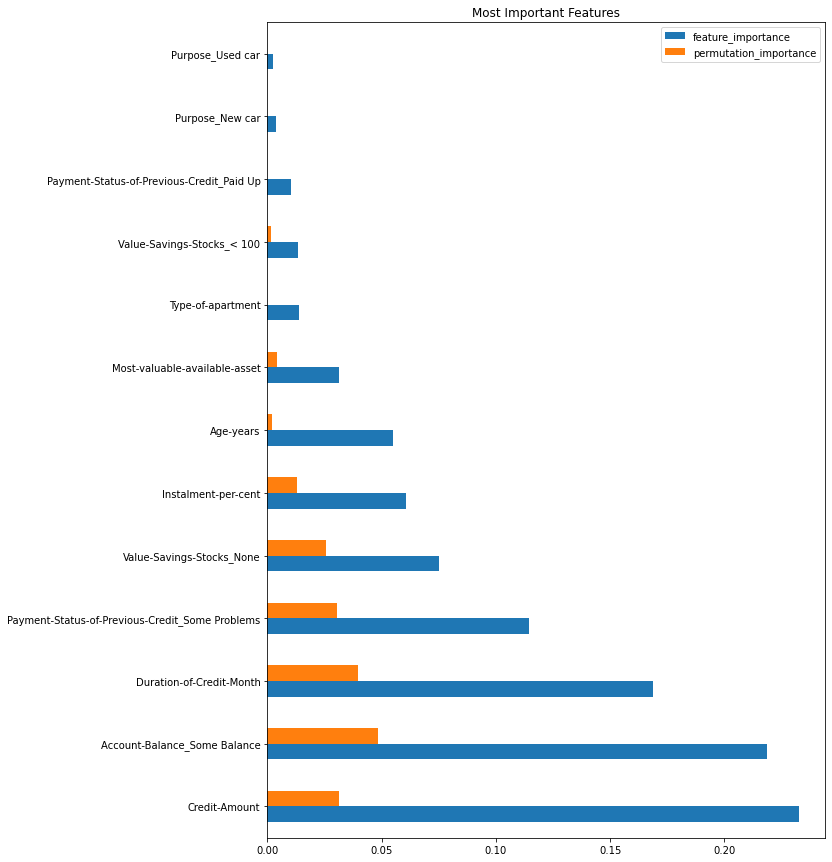

In [76]:
# fatures from the model
feature_importance = pd.Series(
    rfc.feature_importances_,
    index=X_test.columns).sort_values(ascending=False)

permutation_importance = pd.DataFrame(
    result.importances[perm_sorted_idx].T,
    columns=X_test.columns[perm_sorted_idx]).mean().sort_values(
        ascending=False)

important_features = pd.DataFrame([feature_importance,
                                   permutation_importance]).T
important_features.columns = ['feature_importance', 'permutation_importance']
important_features.plot(kind='barh',
                        figsize=(10, 15),
                        title="Most Important Features")
plt.show()

In [77]:
top_most_features = list(important_features[:10].index)
top_most_features

['Credit-Amount',
 'Account-Balance_Some Balance',
 'Duration-of-Credit-Month',
 'Payment-Status-of-Previous-Credit_Some Problems',
 'Value-Savings-Stocks_None',
 'Instalment-per-cent',
 'Age-years',
 'Most-valuable-available-asset',
 'Type-of-apartment',
 'Value-Savings-Stocks_< 100']

After exploring the feature importance, it can be seen that the top 10 variables that contribute the most to the model are:
 - Credit-Amount,
 - Account-Balance,
 - Duration-of-Credit-Month
 - Payment-Status-of-Previous-Credit_Some Problems
 - Value-Savings-Stocks_None
 - Instalment-per-cent
 - Most-valuable-available-asset
 - Age-years
 - Value-Savings-Stocks
 - Payment-Status-of-Previous-Credit

In [78]:
!pip install shap

In [79]:
import shap

# init shap
shap.initjs()

In [80]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

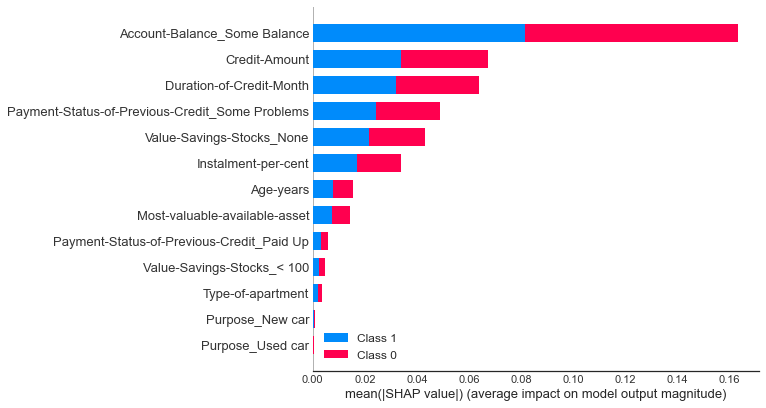

In [81]:
with plt.style.context('seaborn-white'):
    shap.summary_plot(shap_values, X_test)

### TESTING THE LOGISTIC REGRESSION MODEL ON THE TEST DATA

### IMPORTING THE TEST DATA

In [82]:
test_data = pd.read_excel('customers-to-score.xlsx')

#### Exploring the test data set

In [83]:
test_data.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1


In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Account-Balance                    500 non-null    object
 1   Duration-of-Credit-Month           500 non-null    int64 
 2   Payment-Status-of-Previous-Credit  500 non-null    object
 3   Purpose                            500 non-null    object
 4   Credit-Amount                      500 non-null    int64 
 5   Value-Savings-Stocks               500 non-null    object
 6   Length-of-current-employment       500 non-null    object
 7   Instalment-per-cent                500 non-null    int64 
 8   Guarantors                         500 non-null    object
 9   Duration-in-Current-address        500 non-null    int64 
 10  Most-valuable-available-asset      500 non-null    int64 
 11  Age-years                          500 non-null    int64 
 12  Concurre

The test data contains 500 rows, 19 columns and two data types -- object and integer. The objects will be encoded to numerical values later in the work

In [85]:
test_data.isnull().sum()

Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Duration-in-Current-address          0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

 The test data contains no missing values

##### Separating the test data into numerical and categorical variables

In [86]:
testcat_var = test_data.select_dtypes(include = 'object')
testnum_var = test_data.select_dtypes(include = np.number)

In [87]:
testcat_var

,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,Guarantors,Concurrent-Credits,No-of-Credits-at-this-Bank
0,No Account,No Problems (in this bank),Home Related,None,< 1yr,None,Other Banks/Depts,More than 1
1,No Account,No Problems (in this bank),Home Related,None,< 1yr,None,Other Banks/Depts,More than 1
2,No Account,Paid Up,Home Related,£100-£1000,< 1yr,None,Other Banks/Depts,1
3,No Account,No Problems (in this bank),Home Related,None,< 1yr,None,Other Banks/Depts,More than 1
4,No Account,No Problems (in this bank),Home Related,None,1-4 yrs,None,Other Banks/Depts,1
...,...,...,...,...,...,...,...,...
495,No Account,No Problems (in this bank),Home Related,None,4-7 yrs,None,Other Banks/Depts,More than 1
496,No Account,Some Problems,Home Related,None,< 1yr,None,Other Banks/Depts,More than 1
497,No Account,Paid Up,Home Related,None,< 1yr,None,Other Banks/Depts,1
498,No Account,Paid Up,Home Related,None,4-7 yrs,Yes,Other Banks/Depts,1


In [88]:
testnum_var

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,9,2799,2,2,1,36,1,1,2,1,1
1,12,2122,3,2,1,39,1,1,2,1,2
2,24,3758,1,4,4,23,1,1,1,1,1
3,11,3905,2,2,1,36,1,1,2,1,1
4,6,1957,1,4,3,31,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
495,18,3966,1,4,1,33,1,1,1,2,1
496,12,6199,4,2,2,28,1,1,1,2,1
497,24,1987,2,4,1,21,1,1,2,1,1
498,24,2303,4,1,1,45,2,1,1,1,1


#### Dropping the variables dropped during the model building

In [89]:
test_data = test_data.drop(columns=['Occupation', 'Telephone','Concurrent-Credits',
                        'Duration-in-Current-address','Guarantors',
                       'No-of-dependents','Foreign-Worker',
                          'Length-of-current-employment',
                          'No-of-Credits-at-this-Bank'], axis=1)

In [90]:
test_data

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment
0,No Account,9,No Problems (in this bank),Home Related,2799,None,2,1,36,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,3,1,39,1
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,1,4,23,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,2,1,36,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1,3,31,2
...,...,...,...,...,...,...,...,...,...,...
495,No Account,18,No Problems (in this bank),Home Related,3966,None,1,1,33,1
496,No Account,12,Some Problems,Home Related,6199,None,4,2,28,1
497,No Account,24,Paid Up,Home Related,1987,None,2,1,21,1
498,No Account,24,Paid Up,Home Related,2303,None,4,1,45,2


In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Account-Balance                    500 non-null    object
 1   Duration-of-Credit-Month           500 non-null    int64 
 2   Payment-Status-of-Previous-Credit  500 non-null    object
 3   Purpose                            500 non-null    object
 4   Credit-Amount                      500 non-null    int64 
 5   Value-Savings-Stocks               500 non-null    object
 6   Instalment-per-cent                500 non-null    int64 
 7   Most-valuable-available-asset      500 non-null    int64 
 8   Age-years                          500 non-null    int64 
 9   Type-of-apartment                  500 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 39.2+ KB


In [92]:
test_data['Purpose'].value_counts()

Home Related    354
Used car         94
New car          52
Name: Purpose, dtype: int64

In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Account-Balance                    500 non-null    object
 1   Duration-of-Credit-Month           500 non-null    int64 
 2   Payment-Status-of-Previous-Credit  500 non-null    object
 3   Purpose                            500 non-null    object
 4   Credit-Amount                      500 non-null    int64 
 5   Value-Savings-Stocks               500 non-null    object
 6   Instalment-per-cent                500 non-null    int64 
 7   Most-valuable-available-asset      500 non-null    int64 
 8   Age-years                          500 non-null    int64 
 9   Type-of-apartment                  500 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 39.2+ KB


Our data contains two data types -- object and integer . We will therefore encode the categorical variables (objects).  

#### Encoding the categorical variables

In [94]:
test_data = pd.get_dummies(test_data, columns=['Account-Balance', 'Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks'], drop_first=True)

In [95]:
test_data

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000
0,9,2799,2,1,36,1,0,0,0,0,0,1,0
1,12,2122,3,1,39,1,0,0,0,0,0,1,0
2,24,3758,1,4,23,1,0,1,0,0,0,0,1
3,11,3905,2,1,36,1,0,0,0,0,0,1,0
4,6,1957,1,3,31,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18,3966,1,1,33,1,0,0,0,0,0,1,0
496,12,6199,4,2,28,1,0,0,1,0,0,1,0
497,24,1987,2,1,21,1,0,1,0,0,0,1,0
498,24,2303,4,1,45,2,0,1,0,0,0,1,0


In [96]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Duration-of-Credit-Month                         500 non-null    int64
 1   Credit-Amount                                    500 non-null    int64
 2   Instalment-per-cent                              500 non-null    int64
 3   Most-valuable-available-asset                    500 non-null    int64
 4   Age-years                                        500 non-null    int64
 5   Type-of-apartment                                500 non-null    int64
 6   Account-Balance_Some Balance                     500 non-null    uint8
 7   Payment-Status-of-Previous-Credit_Paid Up        500 non-null    uint8
 8   Payment-Status-of-Previous-Credit_Some Problems  500 non-null    uint8
 9   Purpose_New car                                  500 n

##### Using the Random Forest Classifier to predict the target variable (credit worthiness) of our test data

In [97]:
y_predict = rfc.predict(test_data)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 

In [98]:
y_predict = pd.DataFrame(y_predict)
y_predict

,0
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [99]:
y_predict.columns=['Loan_Eligibility']
y_predict

,Loan_Eligibility
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


##### Total number of people who are credit worthy and non-credit worthy

##### Note: The 0 represents credit worthy and 1 represents non-credit worthy

In [100]:
y_predict.value_counts()

Loan_Eligibility
0                   476
1                    24
dtype: int64

The model was able to predict 480 people to be credit worthy and 20 people to be non-credit worthy

In [101]:
result = pd.concat([test_data, y_predict], axis=1)
result

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Loan_Eligibility
0,9,2799,2,1,36,1,0,0,0,0,0,1,0,0
1,12,2122,3,1,39,1,0,0,0,0,0,1,0,0
2,24,3758,1,4,23,1,0,1,0,0,0,0,1,0
3,11,3905,2,1,36,1,0,0,0,0,0,1,0,0
4,6,1957,1,3,31,2,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18,3966,1,1,33,1,0,0,0,0,0,1,0,0
496,12,6199,4,2,28,1,0,0,1,0,0,1,0,0
497,24,1987,2,1,21,1,0,1,0,0,0,1,0,0
498,24,2303,4,1,45,2,0,1,0,0,0,1,0,0


#### Exporting the predictions as a csv file

In [ ]:
y_predict.to_csv('y_predict', index=False)

### KEY HIGHLIGHTS OF THE PROJECT

- The purpose of this project was to determine the best classifier for our data


- I explored the data and dropped some variables which were not important to the model


- I encoded the categorical variables using the one hot encoder to avoid multicollinearity


- I built my models using different classifiers


- I checked for the strenght of the models and concluded that the best classifier for the data is the logistic regression model


- I used the best model (logistic regression model) to predict and know the eligibility of some clients in their loan applications. 